In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
#load dataset
dataset = load_wine()
x = pd.DataFrame(dataset.data)
x.columns = dataset.feature_names

y = pd.DataFrame(dataset.target)
y.columns= ["class"]

print(x.head())
print(y.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [44]:
#split dataset into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133, 1)
(45, 1)


[[15  3  2]
 [ 0 16  0]
 [ 0  3  6]]
0.8222222222222222


<Axes: >

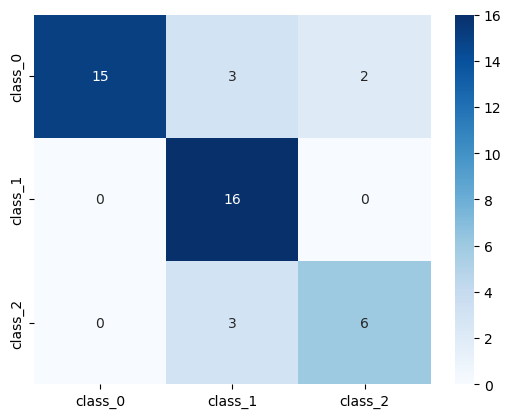

In [47]:
#create baseline model to compare pruned trees against 
clf = tree.DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

#test accuracy of baseline model
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_preds, y_test))

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, yticklabels=dataset.target_names, xticklabels=dataset.target_names, cmap="Blues")

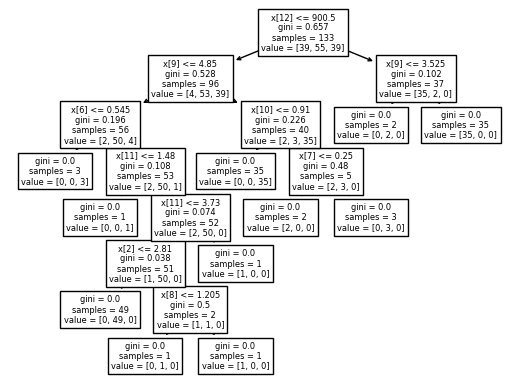

In [50]:
tree.plot_tree(clf)
plt.show()

In [51]:
#get alpha values to fit new models that are trimed versions of the original tree
path = clf.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.00737137 0.01417571 0.01420823 0.01804511 0.0284495
 0.03958008 0.05       0.23067043 0.24714668]


In [55]:
#store list of new newly trained models
clfs = []

for alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(ccp_alpha = alpha)
    model.fit(x_train, y_train)
    clfs.append(model)
    
#list to hold accuracy scores 
acc = []
#test accuracy of each newly created model
for c in clfs:
    preds = c.predict(x_test)
    acc.append(accuracy_score(preds, y_test))

print(list(zip(ccp_alphas, acc)))

[(0.0, 0.7777777777777778), (0.0073713696004717765, 0.7555555555555555), (0.014175710770138015, 0.7777777777777778), (0.014208234665037019, 0.7777777777777778), (0.018045112781954885, 0.7777777777777778), (0.028449502133712657, 0.7777777777777778), (0.03958008228117463, 0.7777777777777778), (0.04999999999999998, 0.8), (0.23067042606516291, 0.6444444444444445), (0.24714667816666241, 0.35555555555555557)]


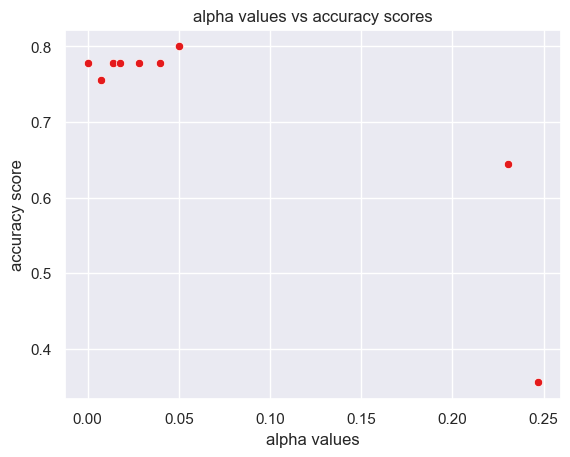

In [69]:
#visualize alpha values used vs accuracy of models

plot = sns.scatterplot(x=ccp_alphas, y=acc)
sns.set_theme(context='notebook', style="whitegrid", palette="Set1")
plot.set(xlabel="alpha values", ylabel="accuracy score", title="alpha values vs accuracy scores")

plt.show()

In [72]:
#test pruned trees accuracy score vs our initial model's accuracy 
print("most accurate pruned model score: ", np.max(acc))
print("most accurate pruned model alpha: ", ccp_alphas[acc.index(np.max(acc))])

most accurate pruned model score:  0.8
most accurate pruned model alpha:  0.04999999999999998


In [ ]:
#our baseline model is the most accurate model for this decision tree